# Simple Linear Regression Using scikit-learn 

## What is scikit-learn ?

    * Used for Machine-learning in Python
    * Simple and efficient tools for data mining and data analysis
    * Works with arrays and not dataframes so we need to transform dataframes to ndarrays
    * Incredible documentation
    * Variety - apart from Deep learning it contains everything
    * Numerically stable
    * Built on NumPy, SciPy, and matplotlib

## Check the following url for documentation:
** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html **

### Importing libraries

In [7]:
!pip install -U sci

In [6]:
# we will need NumPy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# also the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

### Loading the data and printing first 5 observations

In [8]:
data = pd.read_csv("C:\\Users\\DELL\\Desktop\\Machine-Learning\\Lesson-2-Supervised-Learning\\SimpleLinearRegression\\1.01. Simple linear regression.csv")

data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
SAT    84 non-null int64
GPA    84 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [11]:
data.isnull().any()

SAT    False
GPA    False
dtype: bool

False indicates there are no missing values.

# Regression

### Declaring the dependent and independent variable

In [9]:
# dependent variable

y = data['GPA']

# independent variable

x = data['SAT']

In [14]:
# Let's check shape of both the variables

y.shape

(84,)

In [15]:
x.shape

(84,)

#### In order to feed x to sklearn, it should be a 2D array (a matrix)
#### Therefore, we must reshape it but no need to add constant explicitly like using statsmodel
#### Note that this will not be needed when we've got more than 1 feature (as the inputs will be a 2D array by default)


In [16]:
# x_matrix = x.values.reshape(84,1)
x_matrix = x.values.reshape(-1,1)

# Check the shape just in case
x_matrix.shape

(84, 1)

In [17]:
x_matrix

array([[1714],
       [1664],
       [1760],
       [1685],
       [1693],
       [1670],
       [1764],
       [1764],
       [1792],
       [1850],
       [1735],
       [1775],
       [1735],
       [1712],
       [1773],
       [1872],
       [1755],
       [1674],
       [1842],
       [1786],
       [1761],
       [1722],
       [1663],
       [1687],
       [1974],
       [1826],
       [1787],
       [1821],
       [2020],
       [1794],
       [1769],
       [1934],
       [1775],
       [1855],
       [1880],
       [1849],
       [1808],
       [1954],
       [1777],
       [1831],
       [1865],
       [1850],
       [1966],
       [1702],
       [1990],
       [1925],
       [1824],
       [1956],
       [1857],
       [1979],
       [1802],
       [1855],
       [1907],
       [1634],
       [1879],
       [1887],
       [1730],
       [1953],
       [1781],
       [1891],
       [1964],
       [1808],
       [1893],
       [2041],
       [1893],
       [1832],
       [18

## Fitting Regression

In [18]:
# We will start by creating a linear regression object
reg = LinearRegression()

In [19]:
# The whole learning process boils down to fitting the regression
# Note that the first argument is the independent variable, while the second - the dependent (unlike with StatsModels)

reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Elaborating above

**sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None) <br><br>
Ordinary least squares Linear Regression
<br><br>
Parameters:<br><br>* fit_intercept : boolean, optional, default True whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (e.g. data is expected to be already centered).<br><br>* normalize : boolean, optional, default False. This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use sklearn.preprocessing.StandardScaler before calling fit on an estimator with normalize=False.<br><br>* copy_X : boolean, optional, default True. If True, X will be copied; else, it may be overwritten.<br><br>* n_jobs : int or None, optional (default=None). The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.<br>
<br><br>Attributes:<br><br>* coef_ : array, shape (n_features, ) or (n_targets, n_features). Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features.<br><br>* intercept_ : array. Independent term in the linear model.**

### R-Squared

In [21]:
reg.score(x_matrix,y)

0.40600391479679765

### Coefficients

#### Here, since we have only one variable we will get one coefficient only

In [22]:
reg.coef_

array([0.00165569])

### Intercept

In [23]:
reg.intercept_

0.275040299660279

### Predictions

#### predict GPA for SAT = 1250

In [24]:
reg.predict([[1250]])

array([2.34465036])

#### Predict for new data

In [25]:
# To be in line with our knowledge so far, we can create a pandas data frame with several different values of SAT
new_data = pd.DataFrame(data=[1740,1760],columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [26]:
# We can predict the whole data frame in bulk
# Note that the result is an array, this time with 2 elements
reg.predict(new_data)

array([3.15593751, 3.18905127])

In [27]:
# Finally, we can directly store the predictions in a new series of the same dataframe
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


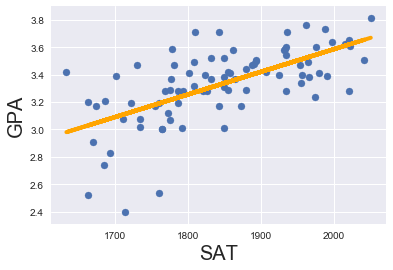

In [28]:
# There are different ways to plot the data - here's the matplotlib code
plt.scatter(x,y)

# Parametrized version of the regression line
yhat = reg.coef_*x_matrix + reg.intercept_

# Non-parametrized version of the regression line
#yhat = 0.0017*x + 0.275

# Plotting the regression line
fig = plt.plot(x, yhat, lw=4, c='orange', label ='regression line')

# Labelling our axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

### Articles to go through to get more clarity on Normalization/Standardization

There are two materials which are particularly useful:

1) The Wikipedia article on Feature scaling: https://en.wikipedia.org/wiki/Feature_scaling

2) This article on L1-norm and L2-norm: http://www.chioka.in/differences-between-the-l1-norm-and-the-l2-norm-least-absolute-deviations-and-least-squares/

## Done!